LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
*   Personal Loan
*   EMI Free Loan
*   Personal Overdraft
*   Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only



> Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?



In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 87.2MB/s]


In [3]:
df=pd.read_csv('logistic_regression.csv')

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


**Data Description**

1.   loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2.   term : The number of payments on the loan. Values are in months and can be either 36 or 60.
1.   int_rate : Interest Rate on the loan
2.   installment : The monthly payment owed by the borrower if the loan originates.
1.   grade : LoanTap assigned loan grade
2.   sub_grade : LoanTap assigned loan subgrade
1.   emp_title :The job title supplied by the Borrower when applying for the loan.
2.   emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
1.   home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
1.   annual_inc : The self-reported annual income provided by the borrower during registration.
1.   verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
1.   issue_d : The month which the loan was funded
2.   loan_status : Current status of the loan - Target Variable
1.   purpose : A category provided by the borrower for the loan request.
1.   title : The loan title provided by the borrower
1.   dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
1.   earliest_cr_line :The month the borrower's earliest reported credit line was opened
2.   open_acc : The number of open credit lines in the borrower's credit file.
2.   pub_rec : Number of derogatory public records
2.   revol_bal : Total credit revolving balance
2.   revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
2.   total_acc : The total number of credit lines currently in the borrower's credit file
2.   initial_list_status : The initial listing status of the loan. Possible values are – W, F
2.   application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
2.   mort_acc : Number of mortgage accounts.
2.   pub_rec_bankruptcies : Number of public record bankruptcies
2.   Address: Address of the individual



###1.Define Problem Statement and perform Exploratory Data Analysis

1.Definition of problem


> The motive of this study is that from given set of attributes for an Individual, determine if a credit line should be extended to them. The attributes include loan statistics like loan amount, rate of interest ect., and applicant statistics like annual income, home ownership etc.



2.Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
#missing value detection
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
#statistical summary of the dataset
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


3.Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='annual_inc', ylabel='Count'>

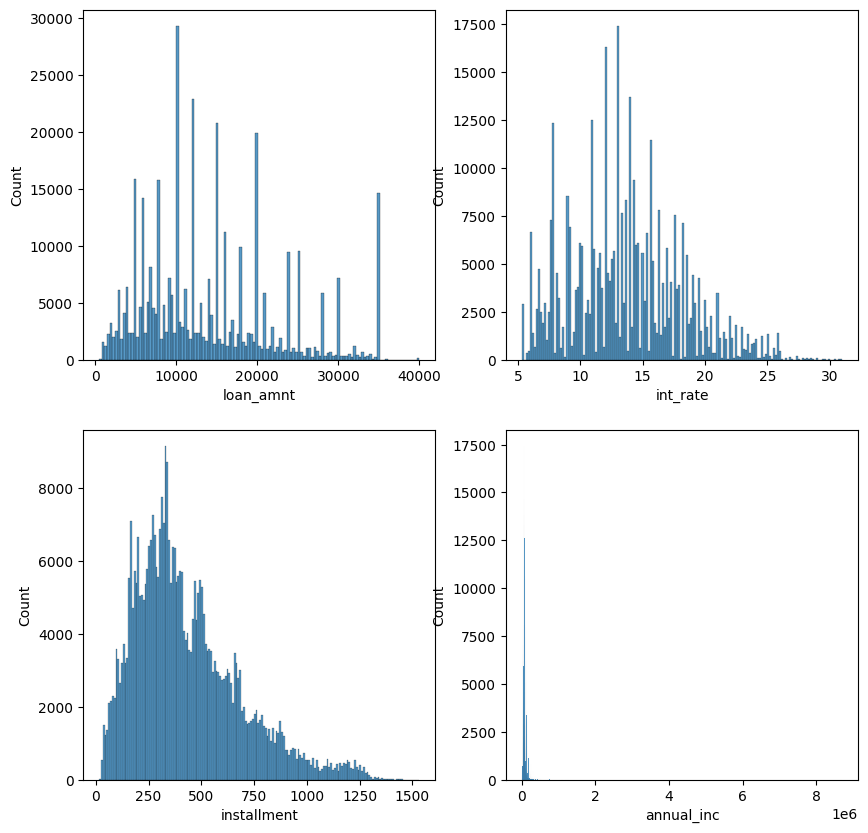

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df['loan_amnt'])
plt.subplot(2,2,2)
sns.histplot(df['int_rate'])
plt.subplot(2,2,3)
sns.histplot(df['installment'])
plt.subplot(2,2,4)
sns.histplot(df['annual_inc'])


<Axes: ylabel='annual_inc'>

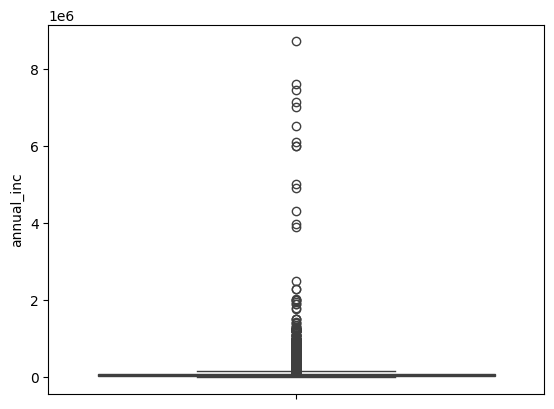

In [ ]:
sns.boxplot(df['annual_inc'])

<Axes: xlabel='count', ylabel='home_ownership'>

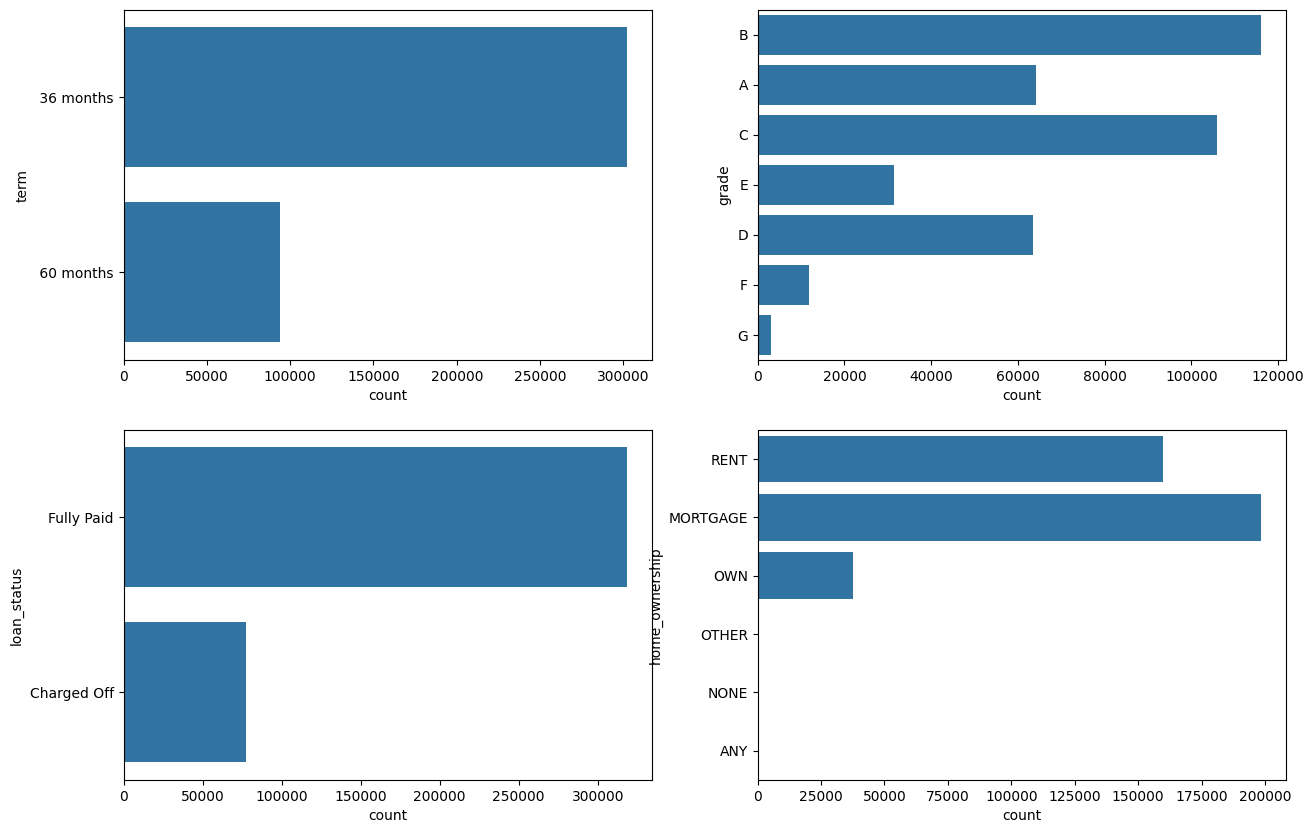

In [ ]:
#count plots for all categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['term'])
plt.subplot(2,2,2)
sns.countplot(df['grade'])
plt.subplot(2,2,3)
sns.countplot(df['loan_status'])
plt.subplot(2,2,4)
sns.countplot(df['home_ownership'])

4.Bivariate Analysis (Relationships between important variable)

In [ ]:
#correlation and heatmap of numerical fields
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

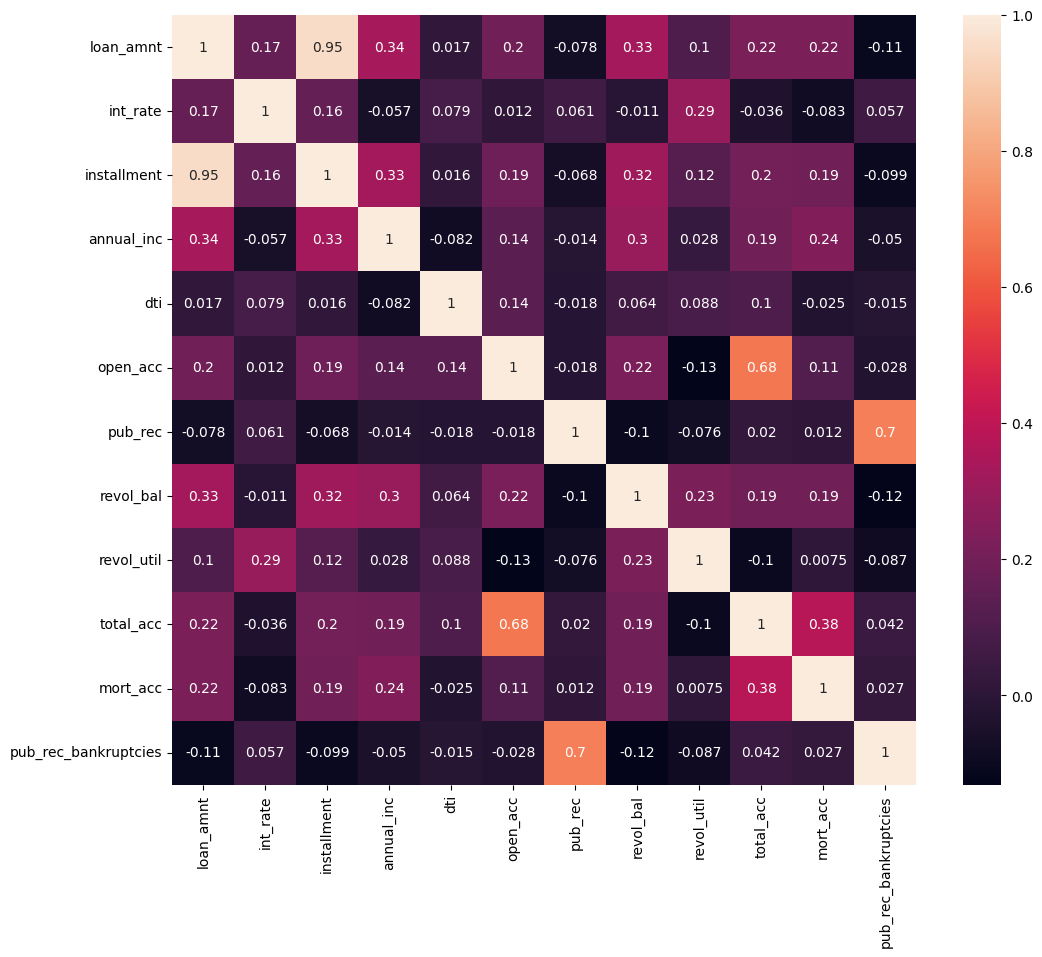

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

5.Illustrate the insights based on EDA



1.   The dataset contains 396 thousand entries and 27 columns
1.   The columns are 12 float fields and 15 object type fields.
1.   'Annual income' have low range and high number of outliers.
1.   The target variable loan status is unbalanced.
1.   Majority of the loans are fully paid, 20% of the total loans being charged off.
1.   Majority of loans are tenured for 36 months. Remaining are tenured for 60 months.
2.   Greatest number of loans are graded B and C. Folloed by A and D.
2.   Interest rate and loan amount have strong positive correlation.
2.   Other fields with strong positive correlation are pub_rec and pub_rec_bankruptcies, and total_acc and open_acc.


###2.Data Preprocessing

1.Duplicate value check

In [ ]:
#duplicate check
df.duplicated().sum()

0

2.Missing value treatment

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
#removing missing entries in relevant columns
df.dropna(subset=['emp_length'],inplace=True)

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,4804
emp_length,0
home_ownership,0
annual_inc,0


In [ ]:
df.dropna(subset=['mort_acc','pub_rec_bankruptcies','revol_util'],inplace=True)

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,3376
emp_length,0
home_ownership,0
annual_inc,0


In [ ]:
df.shape

(340775, 27)

3.Outlier treatment

<Axes: ylabel='annual_inc'>

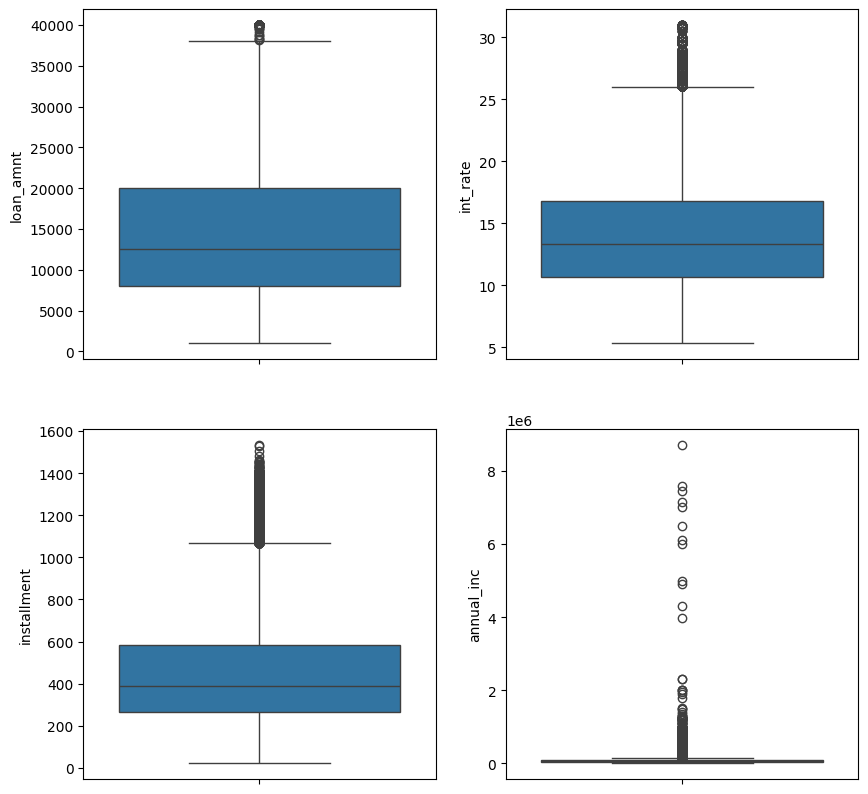

In [ ]:
#boxplots of all continuous variables
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['loan_amnt'])
plt.subplot(2,2,2)
sns.boxplot(df['int_rate'])
plt.subplot(2,2,3)
sns.boxplot(df['installment'])
plt.subplot(2,2,4)
sns.boxplot(df['annual_inc'])


4.Feature engineering

In [ ]:
#dropping irrelevant data for regression
df.drop(columns=['emp_title','title','issue_d','earliest_cr_line','address'],inplace=True)

In [ ]:
df.drop(columns=['purpose'],inplace=True)

In [ ]:
#Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on: Pub_rec, Mort_acc and Pub_rec_bankruptcies
def flag(x):
  if x>1.0:
    return 1
  else:
    return 0
df['pub_rec_flag']=df['pub_rec'].apply(flag)
df['mort_acc_flag']=df['mort_acc'].apply(flag)
df['pub_rec_bankruptcies_flag']=df['pub_rec_bankruptcies'].apply(flag)

In [ ]:
#dropping original columns
df.drop(columns=['pub_rec','mort_acc','pub_rec_bankruptcies'],inplace=True)

In [ ]:
#converting term column into numerical
def term_num(x):
  if x==' 36 months':
    return 36
  else:
    return 60
df['term']=df['term'].apply(term_num)

In [ ]:
#converting emp length into numerical
def emp_length_num(x):
  if x=='< 1 year':
    return 0
  elif x=='1 year':
    return 1
  elif x=='2 years':
    return 2
  elif x=='3 years':
    return 3
  elif x=='4 years':
    return 4
  elif x=='5 years':
    return 5
  elif x=='6 years':
    return 6
  elif x=='7 years':
    return 7
  elif x=='8 years':
    return 8
  elif x=='9 years':
    return 9
  elif x=='10+ years':
    return 10
  else:
    return 0
df['emp_length']=df['emp_length'].apply(emp_length_num)

5.Data preparation for modeling

In [ ]:
#label for grade, subgrade, emp length, home ownership,application type, initial listing status etc
from sklearn.preprocessing import LabelEncoder
column = ['grade','sub_grade','home_ownership','application_type','initial_list_status','verification_status']
label_encoder = LabelEncoder()
for col in column:
  df[col] = label_encoder.fit_transform(df[col])


In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,36,11.44,329.48,1,8,10,5,117000.0,0,...,26.24,16.0,36369.0,41.8,25.0,1,1,0,0,0
1,8000.0,36,11.99,265.68,1,9,4,1,65000.0,0,...,22.05,17.0,20131.0,53.3,27.0,0,1,0,1,0
2,15600.0,36,10.49,506.97,1,7,0,5,43057.0,1,...,12.79,13.0,11987.0,92.2,26.0,0,1,0,0,0
3,7200.0,36,6.49,220.65,0,1,6,5,54000.0,0,...,2.60,6.0,5472.0,21.5,13.0,0,1,0,0,0
4,24375.0,60,17.27,609.33,2,14,9,1,55000.0,2,...,33.95,13.0,24584.0,69.8,43.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,1,8,5,5,64000.0,0,...,10.81,7.0,11456.0,97.1,9.0,1,1,0,0,0
396025,10000.0,60,10.99,217.38,1,8,2,5,40000.0,1,...,15.63,6.0,1990.0,34.3,23.0,1,1,0,0,0
396026,21000.0,36,12.29,700.42,2,10,5,1,110000.0,1,...,21.45,6.0,43263.0,95.7,8.0,0,1,0,0,0
396027,5000.0,36,9.99,161.32,1,5,10,5,56500.0,2,...,17.56,15.0,32704.0,66.9,23.0,0,1,0,0,0


In [ ]:
X=df.drop(columns=['loan_status'])
y=df['loan_status']

In [ ]:
#coding y values into classes
def class_code(x):
  if x=='Fully Paid':
    return 1
  else:
    return 0
y=y.apply(class_code)

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
179376,0.114022,-0.562923,0.113186,0.341142,0.113533,0.271920,-0.283824,0.586501,5.216758,-0.023409,-1.301416,-1.078456,0.962220,-2.267513,-0.658432,-0.888529,-0.007806,-0.1484,1.130197,-0.079943
337782,2.435052,1.776441,1.206435,1.848621,1.620561,1.488808,1.089033,-0.972102,1.352376,-0.023409,-0.283543,-0.113062,0.801693,0.740257,0.518216,1.125456,-0.007806,-0.1484,1.130197,-0.079943
121817,-1.230985,-0.562923,-0.246056,-1.208891,0.113533,-0.032302,-1.107539,-0.972102,-0.451002,-1.259991,1.895686,1.431569,-0.506071,-1.132820,0.097985,-0.888529,-0.007806,-0.1484,1.130197,-0.079943
1642,-0.302573,-0.562923,-0.312582,-0.178983,0.113533,-0.184413,1.089033,-0.972102,0.225265,-0.023409,0.601884,0.273096,0.037514,1.428582,-0.154154,1.125456,-0.007806,-0.1484,-0.884802,-0.079943
84796,-1.314304,-0.562923,-1.370349,-1.334970,-1.393495,-1.401302,-0.558396,-0.972102,-0.257783,-1.259991,-0.438063,0.466175,-0.046958,0.010216,1.526772,-0.888529,-0.007806,-0.1484,1.130197,-0.079943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.296622,-0.562923,-0.623038,-0.204222,-0.639981,-0.488636,0.265319,-0.972102,-0.579815,-1.259991,1.115726,-0.306141,0.133007,0.923810,-0.070108,1.125456,-0.007806,-0.1484,1.130197,-0.079943
259178,1.697084,-0.562923,-0.033171,2.113617,0.113533,-0.184413,-0.832967,1.106035,0.515093,-0.023409,0.518492,0.466175,0.661457,1.553732,0.097985,1.125456,-0.007806,-0.1484,-0.884802,-0.079943
131932,-0.183546,1.776441,-1.086504,-0.700375,-1.393495,-1.097080,1.089033,-0.972102,-0.483205,1.213173,-1.980815,-0.499220,-0.716590,-1.992183,-0.322247,1.125456,-0.007806,-0.1484,1.130197,-0.079943
146867,-0.540628,-0.562923,-0.401283,-0.451269,-0.639981,-0.640747,1.089033,0.586501,-0.096767,-1.259991,-0.365709,0.659253,-0.382342,-0.169166,-0.154154,1.125456,-0.007806,-0.1484,-0.884802,-0.079943


###3.Model building

1.Build the Logistic Regression model and comment on the model statistics

In [ ]:
#importing Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
#fitting the model
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#model accuracy
print('Training Accuracy:',logreg.score(X_train,y_train))
print('Testing Accuracy:',logreg.score(X_test,y_test))

Training Accuracy: 0.8046144816961338
Testing Accuracy: 0.8050326461741618




1.   Model accuracy is 80%. Which can be further improved.
2.   From coeffiecients, sub_grade and interest rate are the features which impart most effects in prediciting the loan status.
3.   Managing unbalancing in the data may help to improve the model.

2.Display model coefficients with column names

In [ ]:
print(list(zip(X_train.columns,np.round(logreg.coef_,4)[0])))

[('loan_amnt', 0.0195), ('term', -0.1907), ('int_rate', 0.6189), ('installment', -0.0828), ('grade', 0.0439), ('sub_grade', -1.1288), ('emp_length', 0.03), ('home_ownership', -0.1257), ('annual_inc', 0.1548), ('verification_status', -0.026), ('dti', -0.1992), ('open_acc', -0.1123), ('revol_bal', 0.0693), ('revol_util', -0.0926), ('total_acc', 0.1145), ('initial_list_status', 0.0334), ('application_type', 0.0152), ('pub_rec_flag', -0.0221), ('mort_acc_flag', 0.0579), ('pub_rec_bankruptcies_flag', 0.0035)]


###4.Results Evaluation

1.ROC AUC Curve & comments

In [ ]:
#importing roc
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
prob = logreg.predict_proba(X_test)

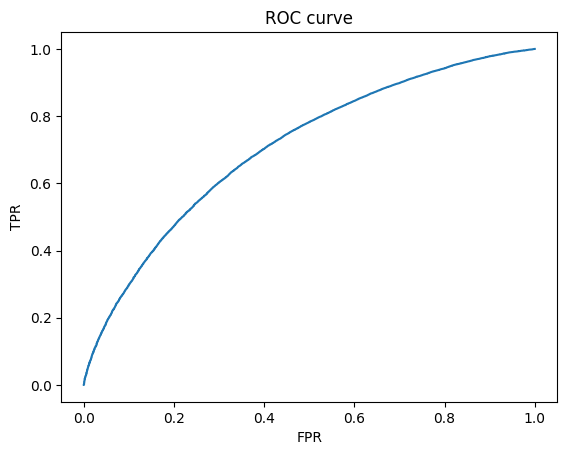

In [ ]:
#roc curve
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
#auc of roc curve
roc_auc_score(y_test,probabilites)

0.7067709802132277

**Comments**


1.   ROC curve shows a moderately good model performance.
2.   Area under ROC curve is 0.7.
3.   Since the data is imbalanced, ROC curve might be dominated by the majority class.



2.Precision Recall Curve & comments

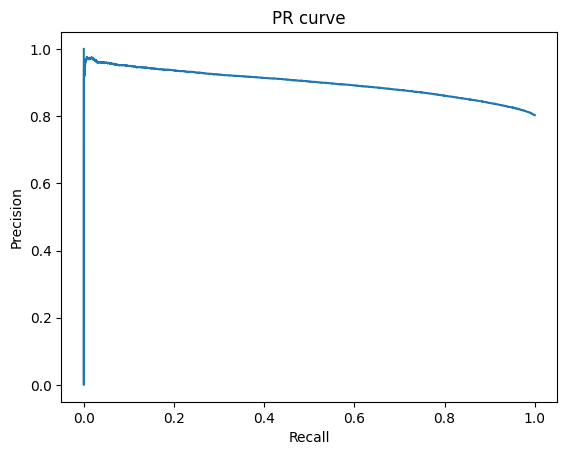

In [ ]:
#importing pr curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(y_test, probabilites)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()


In [ ]:
#auc of pr curve
auc(recall, precision)

0.8985007948437684

**Comments**

1.  Precision-Recall curve shows good model performance.
2.  The area under PR curve is 0.898.

3.Classification Report (Confusion Matrix etc)

In [ ]:
from sklearn.metrics import f1_score
train_y_pred = logreg.predict(X_train)
test_y_pred = logreg.predict(X_test)

train_score = f1_score(y_train, train_y_pred)
test_score = f1_score(y_test, test_y_pred)

print('Training F1 Score:',train_score)
print('Testing F1 Score:',test_score)

Training F1 Score: 0.8893629218524118
Testing F1 Score: 0.8897005113221329


Confusion Matrix


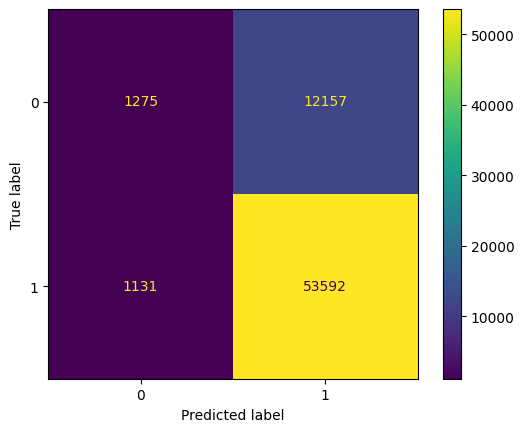

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, test_y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

###Tradeoff Questions:

How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.



   
> The goal here is to reduce real defaulters i.e, reduce false positives.
 A **high precision** model can improve the performance in this aspect.
1.   In hyper parameter tuning, there are methods to choose hyper-parameter which will ensure higher precision like precision scorer.
2.   Class weights can be used to penalize errors in one class more than errors in the other.



Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.


> Non-performing assets are loans of which repayment is not happening for a long period of time. Avoiding NPAs are important in maintaining healthy functioning of the firm. Here also avoiding false positives is the goal.



**Actionable Insights & Recommendations**



*   Model accuracy is 80%. Which can be further improved.
*   From coeffiecients, sub_grade and interest rate are the features which impart most effects in prediciting the loan status.
*   Managing unbalancing in the data may help to improve the model.
*   ROC curve shows a moderately good model performance.Area under ROC curve is 0.7. Since the data is imbalanced, ROC curve might be dominated by the majority class.
*   Precision-Recall curve shows good model performance.The area under PR curve is 0.898.




*   Non-performing assets are loans of which repayment is not happening for a long period of time. Avoiding NPAs are important in maintaining healthy functioning of the firm.
*   The goal here is to reduce real defaulters i.e, reduce false positives. A high precision model can improve the performance in this aspect.

In hyper parameter tuning, there are methods to choose hyper-parameter which will ensure higher precision like precision scorer.
Class weights can be used to penalize errors in one class more than errors in the other.






---

